<a href="https://colab.research.google.com/github/gmn-data-platform/gmn-data-endpoints/blob/main/gmn_data_analysis_template_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Development** Global Meteor Network Data Analysis Template

Starter template for GMN data analysis. Using [gmn-python-api](https://github.com/gmn-data-platform/gmn-python-api) (<a href="https://gmn-python-api.readthedocs.io/en/latest/">docs</a>) and [WesternMeteorPyLib](https://github.com/wmpg/WesternMeteorPyLib).

**Click on "Copy to Drive" above to allow changes to be saved.**

To use this **development** template:
1. Connect to a local Jupyter notebook server using the "Connect" dropdown in the top right following the instructions provided by Google Colab.
2. Install the target `gmn-python-api`, `wmpl` and `dtale` packages are installed in the Python 3.7 site-packages path.
3. Locally run the Docker services in gmn-data-endpoints (the value for `gmn_python_api.gmn_data_store_rest_api.QUERY_URL` should be replaced with `http://0.0.0.0:8001/gmn_data_store{table}.{data_format}?_shape={data_shape}`)
4. To run this, data up to 25/7/2019 should have been sucessful ingested into the gmn-data-store database.

---

## Load meteor trajectory summary data into Pandas using gmn-python-api

In [1]:
# Imports
from datetime import datetime
from gmn_python_api import get_daily_file_content_by_date
from gmn_python_api import read_meteor_summary_csv_as_dataframe
from gmn_python_api import get_meteor_summary_data_reader_compatible
import gmn_python_api.gmn_rest_api
gmn_python_api.gmn_rest_api.QUERY_URL = "http://0.0.0.0:8001/gmn_data_store{table}.{data_format}?_shape={data_shape}"  # The GMN REST API isn't live yet so connect locally

In [2]:
# REST API load test
meteor_summary_file_content_rest_api_1 = get_meteor_summary_data_reader_compatible(
    where_sql="date(beginning_utc_time)='2019-07-25'")[0]
meteor_summary_file_content_rest_api_2 = get_meteor_summary_data_reader_compatible(
    where_sql="date(beginning_utc_time)='2019-07-26'")[0]

meteor_summary_dataframe_rest_api = read_meteor_summary_csv_as_dataframe(
    [meteor_summary_file_content_rest_api_1, meteor_summary_file_content_rest_api_2],
    csv_data_directory_format=False
)

In [3]:
print(f"{meteor_summary_dataframe_rest_api['Vgeo (km/s)'].max()} km/s "
       "was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.")
# 70.88645 km/s was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.

print(f"{meteor_summary_dataframe_rest_api.loc[meteor_summary_dataframe_rest_api['IAU (code)'] == 'PER'].shape[0]} "
       "meteors were estimated to be part of the Perseids shower.")
# 8 meteors were estimated to be part of the Perseids shower.

print(f"Station {meteor_summary_dataframe_rest_api['Num (stat)'].mode().values[0]} "
       "recorded the highest number of meteors.")
# Station 2 recorded the highest number of meteor.

66.54542 km/s was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.
4 meteors were estimated to be part of the Perseids shower.
Station 2 recorded the highest number of meteors.


---

## WesternMeteorPyLib skyplot

Below is a skyplot (BEThel (deg) on y-axis, LAMgeo (deg) on x-axis) of meteors recorded on the 24th of July 2019. wmpl is used for rendering the plot. The red points indicate meteors estimated to be part of the Perseids shower.

2022-05-02 15:26:33,851 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-05-02 15:26:33,863 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


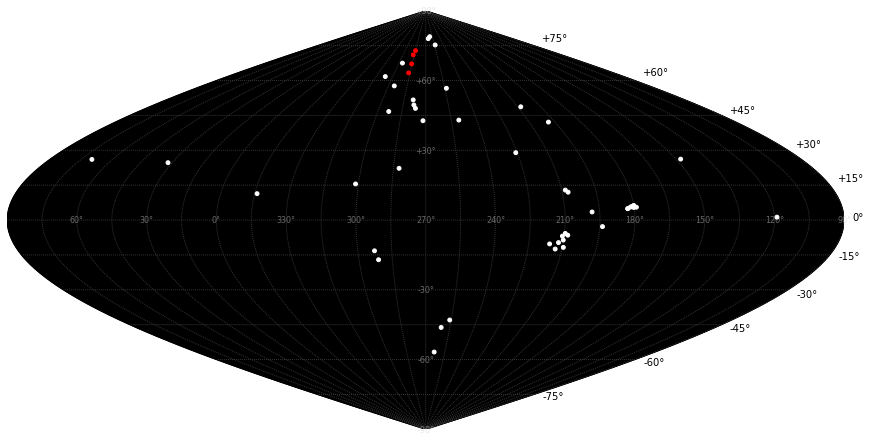

In [21]:
%matplotlib inline

import numpy as np
import wmpl
from wmpl.Utils.PlotCelestial import CelestialPlot
import matplotlib.pyplot as plt

ra = []
dec = []

ra.append(np.deg2rad((meteor_summary_dataframe_rest_api['LAMgeo (deg)'] - meteor_summary_dataframe_rest_api['Sol lon (deg)']) % 360))
dec.append(np.deg2rad(meteor_summary_dataframe_rest_api['BEThel (deg)']))
colors = ["red" if str(x) == "PER" else "white" for x in meteor_summary_dataframe_rest_api['IAU (code)']]

plt.rcParams['figure.figsize'] = 15, 25
celes_plot = CelestialPlot(ra, dec, projection='sinu', lon_0=-90)
celes_plot.scatter(ra, dec, c=colors, s=15)

---

## D-Tale

[D-Tale](https://github.com/man-group/dtale) is a visualiser for Pandas data structures. It can be used to explore and create plots for `meteor_summary_dataframe_rest_api`. Run the cells below and click on the link generated to access D-Tale.

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

d = dtale.show(meteor_summary_dataframe_rest_api)
d._main_url